# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np

unique_labels = pd.read_csv('./signnames.csv')

# TODO: Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = train['sizes'][1]
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(unique_labels)

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

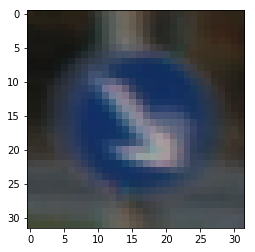

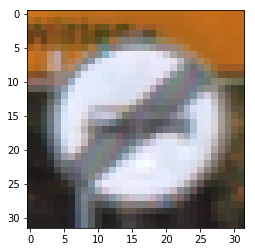

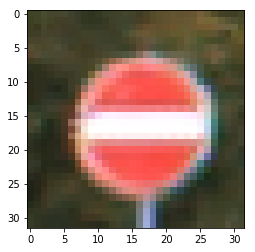

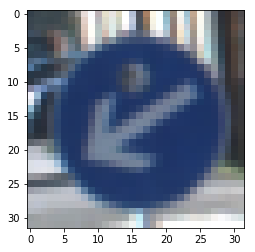

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint as rand
from random import choice 
import cv2

for i in range(4):
    #plt.subplot(2, 2, i+1)
    image_number = rand(0, n_train)
    image = X_train[image_number]
    image_plot = plt.imshow(image)
    plt.show(image_plot)

# Visualizations will be shown in the notebook.
%matplotlib inline

34799


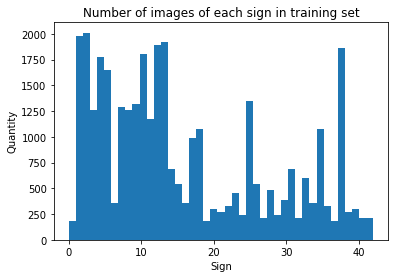

In [4]:
#Histogram of data distribution

plt.hist(y_train, bins=n_classes)
plt.title("Number of images of each sign in training set")
plt.xlabel("Sign")
plt.ylabel("Quantity")
plt.plot()

print (len(y_train))

With the graph above we can see that the data is not well distributed, having signs with less than 250 images and others with almost 2,000. This is is a great opportunity to augment the data to have a more evenly distributed dataset.

This can be an issue because the model will naturally tend to "guess" more towards the images which had more examples from, as it saw more during the training.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Data Augmentation
On this first step of the pre-processing I'm going to augment the data for 2 main reasons:
    1.- To have a more balanced data distribution.
    2.- Having the same image but with a transformation (zoom, rotation, translation, etc.) should help generalize.
    3.- Having more 'data points' is always better.
    
After a lot of trial and error I found the best quantity to augment each label was 1000. As the paper said, rotatin between -15 and 15 degrees and translating at most 0.2 shouldn't affect the image. I made random augments with this thresholds until I got the quantity I needed.

In [ ]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

def transform_image(image, angle, translation):
    height, width, channels = image.shape
    center = (width // 2, height // 2)
    image = cv2.warpAffine(image, cv2.getRotationMatrix2D(center, np.random.uniform(-angle, angle), 1), (width, height))
    image = cv2.warpAffine(image, np.array([[1, 0, translation * width * np.random.uniform(-1, 1)],
                                            [0, 1, translation * height * np.random.uniform(-1, 1)]]), (width, height))
    return image

def data_aug(source, destination, count):
    with open(source, mode='rb') as f:
        source_data = pickle.load(f)
    source_X, source_Y = source_data['features'], source_data['labels']
    

    #augmented_Y = np.array(source_Y)
    #ytrain_list = np.array(source_Y).tolist()
    #sign_titles = get_sign_titles()
    
    
    #for i in range(len(source_X)):
    #    if i == 0:
    #        ytrain_list = np.array(source_Y).tolist()
    #    else:
    #        ytrain_list = np.array(augmented_Y).tolist()
        
        
    #    if ytrain_list.count(ytrain_list[i]) < count:
    #        print("new image", i, ytrain_list.count(ytrain_list[i]))
    #        image = transform_image(source_X[i], rand(-15, 15), choice([-0.2, -0.1, 0, 0.1, 0.2]))
            
    #        if i == 0:
    #            augmented_X = np.expand_dims(image, axis=0)
    #            augmented_Y = np.array([source_Y[i]])
    #        else:
    #            augmented_X = np.concatenate((augmented_X, np.expand_dims(image, axis=0)))
    #            augmented_Y = np.append(augmented_Y, source_Y[i])
                
    #augmented_X = np.concatenate((source_X, augmented_X))
    #augmented_Y = np.concatenate((source_Y, augmented_Y))
    
    ytrain_list = np.array(y_train).tolist()
    count_label_arr = []
    for i in range(len(unique_labels)):
        count_label = ytrain_list.count(i)
        count_label_arr.append(count_label)
                
    delete_index_arr = []
    augmented_X = np.expand_dims(source_X[0], axis=0)
    augmented_Y = np.array([source_Y[0]])
    added_count = 0
    desired_quant = len(unique_labels) * count
    finish = False

    while not finish:
    #while(all(count >= i for i in count_label_arr)):
    #while(sum(count_label_arr) < desired_quant):
        for i in range(len(source_X)):
            #rand_idx = np.random.randint(source_X.shape[0])
            image_label_id = source_Y[i]
            label_total_count = count_label_arr[image_label_id]
            #print (label_total_count)
            if label_total_count < count:
                image = transform_image(source_X[i], rand(-15, 15), choice([-0.2, -0.1, 0, 0.1, 0.2]))
            
                augmented_X = np.concatenate((augmented_X, np.expand_dims(image, axis=0)))
                augmented_Y = np.append(augmented_Y, source_Y[i])
            
                count_label_arr[image_label_id] = count_label_arr[image_label_id] + 1
                added_count = added_count + 1
            
                if added_count % 1000 == 0:
                    print (i, added_count)
                    print(count_label_arr)
                
                for x in range(len(count_label_arr)):
                    if count_label_arr[x] < count:
                        finish = False
                        break
                    else:
                        finish = True
            
    augmented_X = np.concatenate((source_X, augmented_X))
    augmented_Y = np.concatenate((source_Y, augmented_Y))

    new_data = {'features': np.concatenate((source_X, augmented_X)), 'labels': np.concatenate((source_Y, augmented_Y))}
    print("Added ", added_count, "fake images")
    with open(destination, mode='wb') as f:
        pickle.dump(new_data, f)
    print (count_label_arr)
    return new_data

data_aug('train.p', 'augmented_train1000.p', 1000)

print ("Done with augmentation")

Afterwards I will grayscale the images as it will help with the speed of the NN training and also normalize the images.

In [5]:
from sklearn.utils import shuffle

with open('augmented_train1000.p', mode='rb') as f:
    aug_train = pickle.load(f)
X_train, y_train = aug_train['features'], aug_train['labels']

# Convert to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

X_train_gray = (X_train_gray - X_train_gray.mean()) / (np.max(X_train_gray) - np.min(X_train_gray))
X_test_gray = (X_test_gray - X_test_gray.mean()) / (np.max(X_test_gray) - np.min(X_test_gray))
X_valid_gray = (X_valid_gray - X_valid_gray.mean()) / (np.max(X_valid_gray) - np.min(X_valid_gray))

X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

X_train, y_train = shuffle(X_train, y_train)
print("Done")

Done


Now we can see below the new image dataset, we still have some labels that have much more examples than others but the variance is lower.

86490


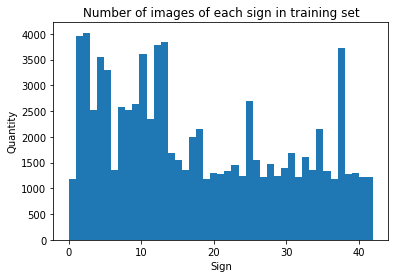

In [6]:
#Histogram of data distribution

plt.hist(y_train, bins=n_classes)
plt.title("Number of images of each sign in training set")
plt.xlabel("Sign")
plt.ylabel("Quantity")
plt.plot()

print (len(y_train))

In [7]:
ytrain_list = np.array(y_train).tolist()
count_label_arr = []
for i in range(len(unique_labels)):
    count_label = ytrain_list.count(i)
    count_label_arr.append(count_label)
print (count_label_arr)
print(sum(count_label_arr))

[1180, 3960, 4020, 2520, 3540, 3300, 1360, 2580, 2520, 2640, 3600, 2340, 3780, 3840, 1690, 1540, 1360, 1990, 2160, 1180, 1300, 1270, 1330, 1450, 1240, 2700, 1540, 1210, 1480, 1240, 1390, 1690, 1210, 1599, 1360, 2160, 1330, 1180, 3720, 1270, 1300, 1211, 1210]
86490


### Model Architecture

This is a 5-layer model achieved by a lot of trial and error but based on LeCun's. My first 2 layers are convolutional layers, each with a ReLu activation and pooling layer. Afterwards, the next 3 layers are all fully connected layers lowering the flattenned layer from 800 to the last 43.

For the convolutional layers I decided to make the filters "big" (5x5) with a valid padding a 1-stride. Both pooling layers are 2x2 filters with 2x2 strides to lose the least amount of data while still filtering down. I decided to make it really deep, as we start with a 1 deep image, get up to 16 on the first convolutional layer and then to 32 to end up with a deep-flattenned network of 800.

After all the trial and error I think the key was (as it's always been said) to make it wide and deep, without exagerating because then it can take couple of hours to train and that slows down the whole process. Also, having a "big" filter at the first stages is important to try to gather as much info as possible in your base layer, before heading to the next layers where the NN works with ever-less quantity of information.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 100
DROPOUT = 0.9

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #ReLU Activation + Pooling (Input = 28x28x16. Output = 14x14x16) + Dropout
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, DROPOUT)

    
    
    #Layer 2: Convolutional. Input = 14x14x16 Output = 10x10x32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    #ReLU Activation + Pooling (Input = 10x10x32. Output = 5x5x32) + Dropout
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, DROPOUT)

    
    
    #Flatten. Input = 5x5x32. Output = 800
    fc0   = flatten(conv2)
    
    

    #Layer 3: Fully Connected. Input = 800. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    #ReLU Activation + Dropout.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, DROPOUT)
    
    

    #Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    #logits    = tf.matmul(fc1, fc2_W) + fc2_b

    #aaReLU Activation + Dropout.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, DROPOUT)
    
    

    #Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    #fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    
    # #ReLU Activation + Dropout.
    # fc3    = tf.nn.relu(fc3)
    # fc3 = tf.nn.dropout(fc3, DROPOUT)
    
    
    
    # #Layer 6: Fully Connected. Input = 270. Output = 43.
    # fc4_W  = tf.Variable(tf.truncated_normal(shape=(270, 43), mean = mu, stddev = sigma))
    # fc4_b  = tf.Variable(tf.zeros(43))
    # logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

## Features and Labels

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    saver.save(sess, './lenet')
    print("Model saved")

In [12]:
import tensorflow as tf

saver = tf.train.import_meta_graph('lenet.meta')
    
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    #sess.run(tf.global_variables_initializer())    
    saver = tf.train
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("NN Restored")

Test Accuracy = 0.936
NN Restored


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

On this step I looked for 5 images on the Internet that didn't had watermarks or anything on top of the sign. It's important to note that I had to crop and scale the images beforehand to fit the 32x32 needed size for our NN.

### Load and Output the Images

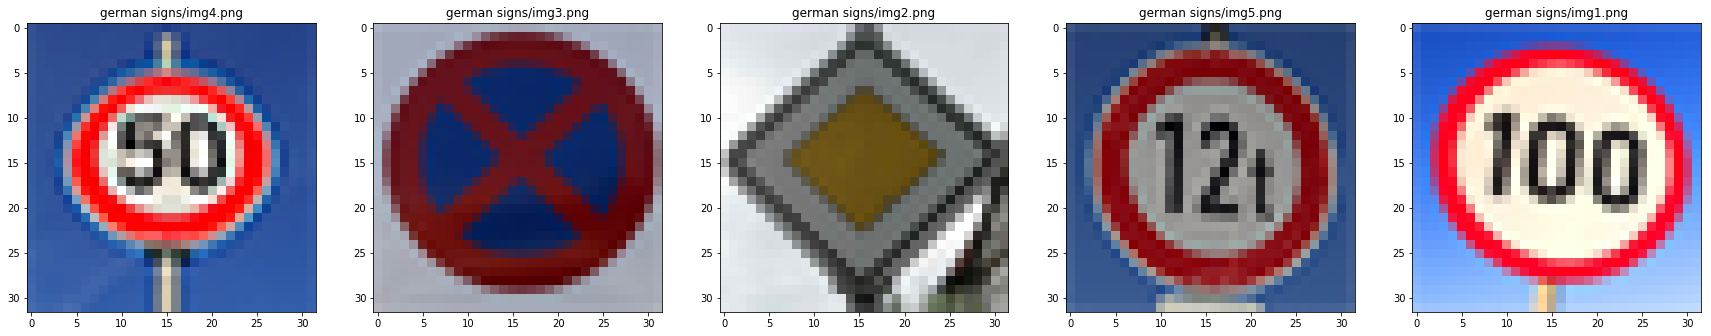

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import PIL.Image as Image
import matplotlib.image as mpimg

# def show_image(image_path):    
#     print("tried")
#     image = mpimg.imread(image_path)
#     plt.imshow(image)
    
# paths = ['german signs/' + file for file in os.listdir('german signs/')]
# print (paths)

# for image in paths:
#     show_image(image)
    
    
    

paths = ['german signs/' + file for file in os.listdir('german signs/')]
test_images = []
for img in paths:
    image = Image.open(img)
    test_images.append(image)

f, axarr = plt.subplots(1,5, figsize=(30,15))
for i in range(5):
    axarr[i].set_title(paths[i])
    axarr[i].imshow(test_images[i])
    


### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import csv
from scipy import misc

def get_sign_titles():
    sign_titles = []
    with open('signnames.csv', 'rt', encoding='utf8') as f:
        sign_names = csv.reader(f, delimiter=',')
        for i, row in enumerate(sign_names):
            if i != 0:
                sign_titles.append(row[1])
    return sign_titles

def predict(img):
    saver = tf.train.import_meta_graph('lenet.meta')
    with tf.Session() as sess:
        saver.restore(sess,tf.train.latest_checkpoint('./'))
        saver = tf.train
        sess = tf.get_default_session()
    
        classification = sess.run(tf.argmax(logits, 1), feed_dict={x: [img]})
        print(classification)
        sign_titles = get_sign_titles()
        print('NN predicted', sign_titles[classification[0]])


# Convert to grayscale
# new_images = np.zeros((5,32,32,3), dtype=np.float32) 
# new_images = [5]
# new_images[0]= mpimg.imread(paths[0])
# new_images.append(mpimg.imread(paths[1]))
# new_images.append(mpimg.imread(paths[2]))
# new_images.append(mpimg.imread(paths[3]))
# new_images.append(mpimg.imread(paths[4]))

# new_images = np.ones((5,32,32,3), dtype=np.float32) 
# #new_images = []
# new_images[0] = cv2.imread('german_signs/img1.png', 1)
# new_images[1] = cv2.imread('german_signs/img2.png', 1)
# new_images[2] = cv2.imread('german_signs/img3.png', 1)
# new_images[3] = cv2.imread('german_signs/img4.png', 1)
# new_images[4] = cv2.imread('german_signs/img5.png', 1)


new_images = []
for img in paths:
    image = Image.open(img)
    image = image.convert('RGB')
    image = np.array(list(image.getdata()))
    image = np.reshape(image, (32,32,3))
    
    #im = Image.new('RGB', (32,32), (255, 255, 255))
    #im.paste(image, None)
    
    new_images.append(image)

new_images = np.array(new_images, dtype=np.float32)

#plt.imshow(new_images[0])

# image_plot = plt.imshow(image)
# plt.show(image_plot)

#test_images = test_images.convert("L")
#test_images = numpy.array(test_images)

new_images_gray = np.sum(new_images/3, axis=3, keepdims=True)

new_images_gray = (new_images_gray - new_images_gray.mean()) / (np.max(new_images_gray) - np.min(new_images_gray))

new_images_processed = new_images_gray

#plt.imshow(new_images_processed[0])

for image in new_images_processed:
    predict(image)

[0]
NN predicted Speed limit (20km/h)
[32]
NN predicted End of all speed and passing limits
[12]
NN predicted Priority road
[8]
NN predicted Speed limit (120km/h)
[0]
NN predicted Speed limit (20km/h)


### Analyze Performance

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

There was a 20% accuracy on the prediction of the Internet-gathered images. Only the 3rd one (Priority road) was correctly predicted. This is actually pretty bad compared to the ~93% accuracy of our validation and test sets.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

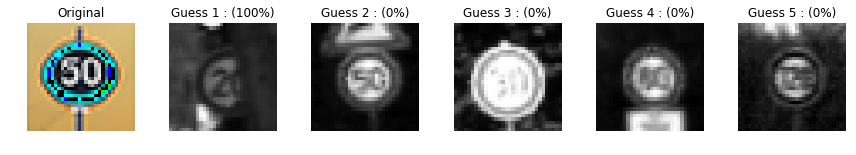

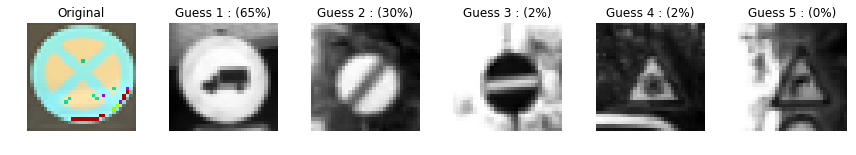

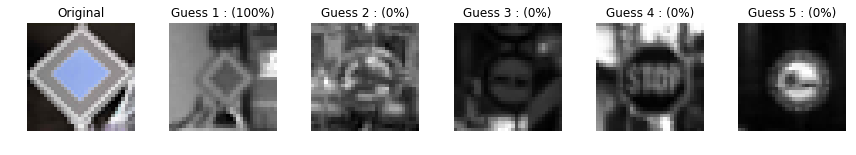

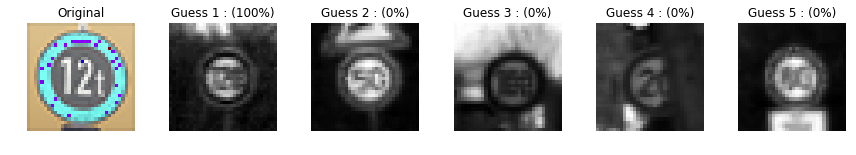

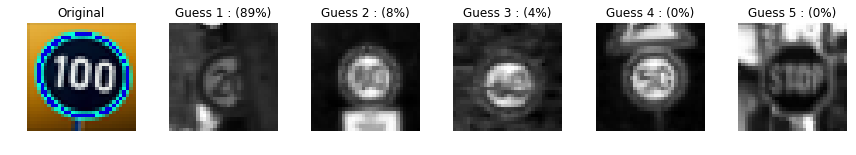

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
            axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: new_images_processed})
    my_top_k = sess.run(top_k, feed_dict={x: new_images_processed})
#     print(my_top_k)

    for i in range(5):
        figures = {}
        labels = {}
        
        figures[0] = new_images[i]
        labels[0] = "Original"
        
        for j in range(k_size):
#             print('Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j]))
            labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
            
#         print()
        #imshow(figures)
        #print(labels)
        plot_figures(figures, 1, 6, labels)

On this chart we can see that even though my NN only predicted correctly 1/5 images, on the other ones it got really closed,
either by confusing a '12t' with a '120' or having the 2nd prediction being the right one.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 